In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\DATA\AirPassengers.csv')

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
dateparse=lambda x:pd.datetime.strptime(x,'%Y-%m')
data=pd.read_csv(r'C:\Users\prince.garg\Desktop\Deepika\LetsUpgrade_AI_ML\DATA\AirPassengers.csv',parse_dates=['Month'],index_col
                ='Month',date_parser=dateparse)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
ts=data['#Passengers']

In [7]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
from datetime import datetime

In [9]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

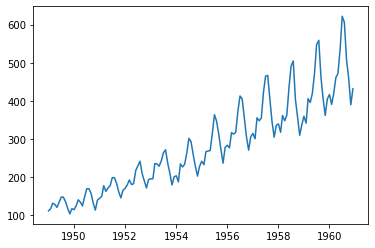

In [10]:
plt.plot(ts)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [24]:
def test_stationarity(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling mean')
    std=plt.plot(rolstd,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    plt.show(block=False)
    
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statstic','p-value','#lags used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value(%s)'%key]=value
    print(dfoutput)

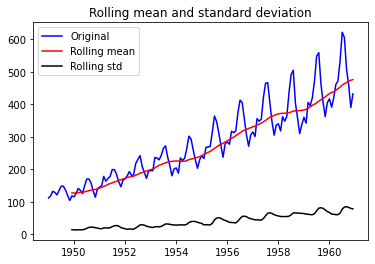

Test Statstic                    0.815369
p-value                          0.991880
#lags used                      13.000000
Number of observations used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


In [25]:
test_stationarity(ts)

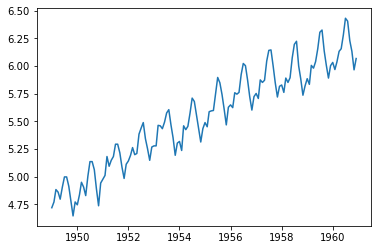

In [26]:
ts_log=np.log(ts)
plt.plot(ts_log)

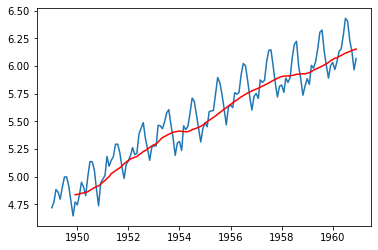

In [27]:
moving_avg=ts_log.rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [28]:
ts_log_moving_avg_diff=ts_log-moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

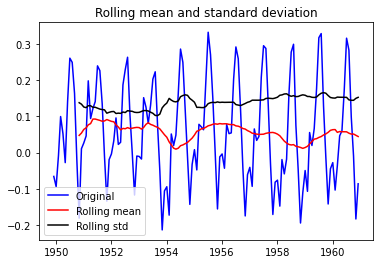

Test Statstic                   -3.162908
p-value                          0.022235
#lags used                      13.000000
Number of observations used    119.000000
Critical Value(1%)              -3.486535
Critical Value(5%)              -2.886151
Critical Value(10%)             -2.579896
dtype: float64


In [29]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

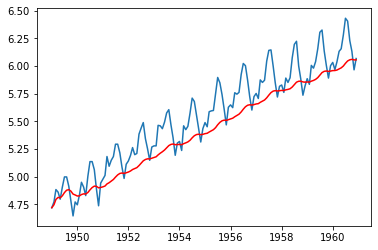

In [30]:
expweighted_avg=ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg,color='red')

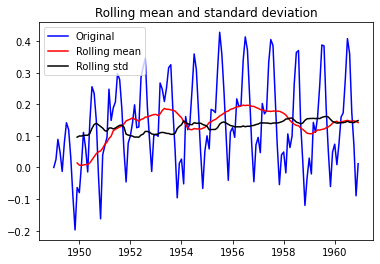

Test Statstic                   -3.601262
p-value                          0.005737
#lags used                      13.000000
Number of observations used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


In [31]:
ts_log_ewma_diff=ts_log-expweighted_avg
test_stationarity(ts_log_ewma_diff)

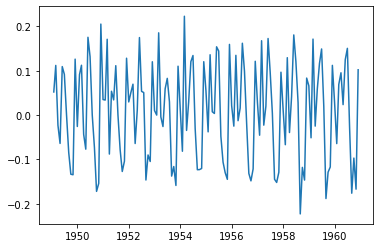

In [32]:
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

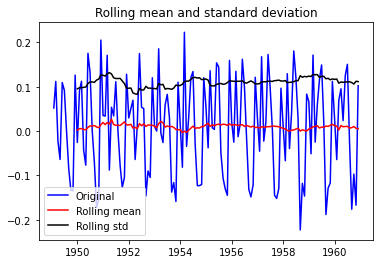

Test Statstic                   -2.717131
p-value                          0.071121
#lags used                      14.000000
Number of observations used    128.000000
Critical Value(1%)              -3.482501
Critical Value(5%)              -2.884398
Critical Value(10%)             -2.578960
dtype: float64


In [33]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

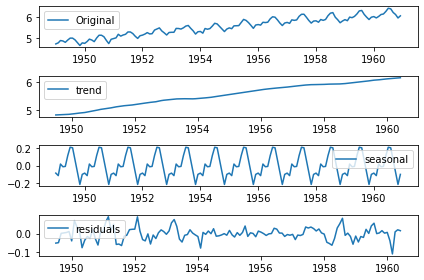

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log)
trend=decomposition.trend
seasonal=decomposition.seasonal

residual=decomposition.resid
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

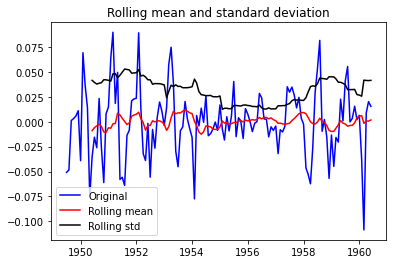

Test Statstic                 -6.332387e+00
p-value                        2.885059e-08
#lags used                     9.000000e+00
Number of observations used    1.220000e+02
Critical Value(1%)            -3.485122e+00
Critical Value(5%)            -2.885538e+00
Critical Value(10%)           -2.579569e+00
dtype: float64


In [37]:
ts_log_decompose=residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


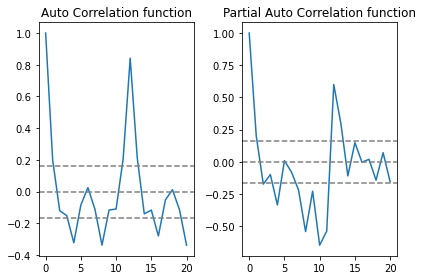

In [41]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(ts_log_diff,nlags=20)
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Auto Correlation function')
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Auto Correlation function')
plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:1.5023')

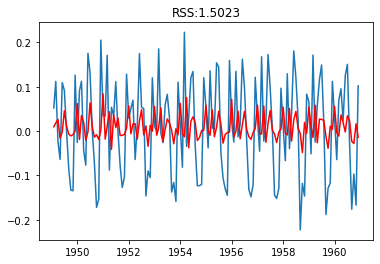

In [42]:
# AR model
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(ts_log,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:1.4721')

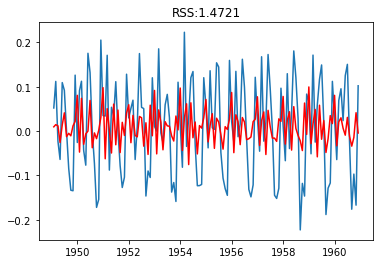

In [44]:
# MA model
model=ARIMA(ts_log,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:1.0292')

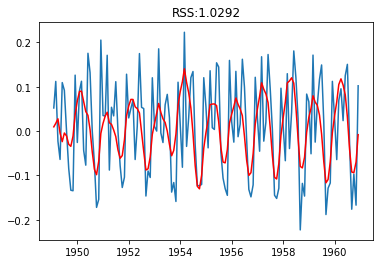

In [45]:
# Combined model
model=ARIMA(ts_log,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [46]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023889
dtype: float64


In [47]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [50]:
predictions_ARIMA_log=pd.Series(ts_log,index=ts_log.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
dtype: float64

Text(0.5, 1.0, 'RMSE:260221.6972')

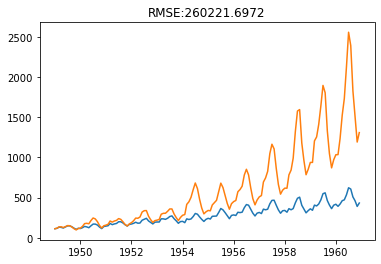

In [51]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE:%.4f'% sum((predictions_ARIMA-ts)**2/len(ts)))

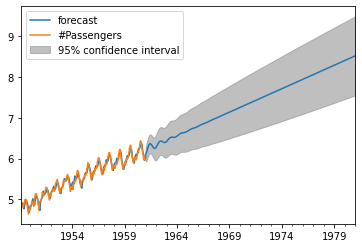

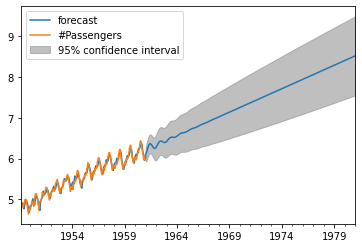

In [52]:
results_ARIMA.plot_predict(1,384)

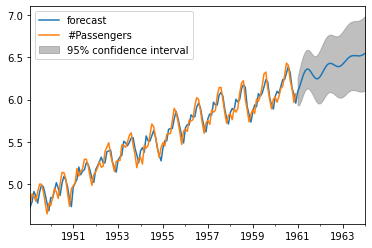

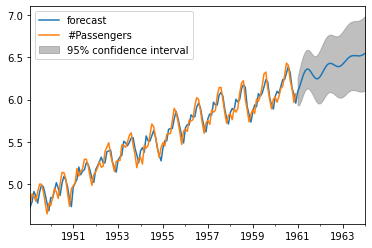

In [53]:
results_ARIMA.plot_predict(1,180)